# Intro to `xarray` `DataArrays` and `Datasets`

In this notebook, we will take a look at how to manipulate data using `xarray`. Be sure to install `xarray` in your own environment or you can uncomment and use the following command:

In [74]:
#!conda install --yes xarray,netCDF4,cartopy

In [75]:
# import packages
import xarray as xr

## Data we will be working with:

In this example, we will be reading in some atmospheric reanalysis data. [Reanalysis](https://climatedataguide.ucar.edu/climate-data/atmospheric-reanalysis-overview-comparison-tables) data is generated by weather and climate prediction centres worlwide. One of the best-established reanalysis products, the NCEP (or *NCEP-NCAR-DOE*) reanalysis, is easy to access through a simple interface, which is stored physically in a self-describing netCDF file. The example below will access the temperature file for a particular year of NCEP reanalysis. The default year is 2000 but you can choose any year you'd like. 

This particular reanalysis product provides data four times each day at midnight, 6am, noon and 6pm (00:00:00, 06:00:00, 12:00:00, and 18:00:00).

### Reading Data using OPeNDAP

We are going to access this data using an OPeNDAP URL. From the [NASA Earthdata website](https://earthdata.nasa.gov/collaborate/open-data-services-and-software/api/opendap):
>Open-source Project for a Network Data Access Protocol (OPeNDAP) is the developer of client/server software, of the same name, that enables scientists to share data more easily over the internet. With OPeNDAP, you can access data using an OPeNDAP URL of any database server that supports OPeNDAP. You can do this via command-line, internet browser, or a custom UI. 

We will first read in a netcdf file as an `xarray.DataArray` and then as a `xarray.Dataset`.

#### Read netcdf file as DataArray

In [76]:
# location of ncep reanalysis data
base_url = 'https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis2/pressure/'

# information needed to build full url
variable = 'air' # air temperature in K
year = 2000
file = f'{base_url}{variable}.{year}.nc' 

# open netcdf file using xarray
ncep = xr.open_dataarray(file,decode_times=True) #decode_times = True converts time coordinate to datetime object

In [77]:
# display contents of DataArray
ncep

<xarray.DataArray 'air' (time: 1464, level: 17, lat: 73, lon: 144)>
[261622656 values with dtype=float32]
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 2000-01-01 ... 2000-12-31T18:00:00
Attributes:
    long_name:      6-hourly Air Temperature on Pressure Levels
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    dataset:        NCEP/DOE AMIP-II Reanalysis (Reanalysis-2)
    level_desc:     Pressure Levels
    statistic:      Individual Obs
    parent_stat:    Other
    standard_name:  air_temperature
    actual_range:   [178.  323.9]
    valid_range:    [137.5 362.5]
    _ChunkSizes:    [  1   1  73 144]

Note that in addition to the variable `air`, we have a few other items in our `DataArray`:
- four dimensions: `time, level, lat, lon`
- four coordinate arrays corresponding to the four dimensions
- 14 attributes

You can click on the `Attributes` item above to expand and you will see the metadata.

#### Read netcdf file as Dataset

We can also read in the netcdf file as an `Dataset`. This is often the preferred way of doing it.

In [78]:
# open netcdf file using xarray
ncep = xr.open_dataset(file,decode_times=True)

# display contents of Dataset
ncep

<xarray.Dataset>
Dimensions:  (level: 17, lat: 73, lon: 144, time: 1464)
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 2000-01-01 ... 2000-12-31T18:00:00
Data variables:
    air      (time, level, lat, lon) float32 ...
Attributes:
    Conventions:                     CF-1.0
    title:                           4x Daily NCEP/DOE Reanalysis 2
    comments:                        Data is from \nNCEP/DOE AMIP-II Reanalys...
    platform:                        Model
    source:                          NCEP/DOE AMIP-II Reanalysis (Reanalysis-...
    institution:                     National Centers for Environmental Predi...
    dataset_title:                   NCEP-DOE AMIP-II Reanalysis
    References:                      https://www.psl.noaa.gov/data/gridded/da...
    source_url:                      http://www.cpc.ncep.noaa.gov/products/we...
    history:                         created 2002/03/15 by RHS (netCDF2.3)\nC...
    DODS_EXTRA.Unlimited_Dimension:  time

Note we have a few other items in our `Dataset`:
- one data variable: `air`
- four dimensions: `time, level, lat, lon`
- four coordinate arrays corresponding to the four dimensions
- 11 attributes

You can click on the `Attributes` item above to expand and you will see the metadata.

We can access different components of the `Dataset`, dictionary-style, just like `pandas`.

In [79]:
# display data variable
ncep['air']

# alternative
#ncep.air

<xarray.DataArray 'air' (time: 1464, level: 17, lat: 73, lon: 144)>
[261622656 values with dtype=float32]
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 2000-01-01 ... 2000-12-31T18:00:00
Attributes:
    long_name:      6-hourly Air Temperature on Pressure Levels
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    dataset:        NCEP/DOE AMIP-II Reanalysis (Reanalysis-2)
    level_desc:     Pressure Levels
    statistic:      Individual Obs
    parent_stat:    Other
    standard_name:  air_temperature
    actual_range:   [178.  323.9]
    valid_range:    [137.5 362.5]
    _ChunkSizes:    [  1   1  73 144]

The above should look just like what we read in when we read the netcdf file as a dataArray! You'll see here that the attributes of a particular `dataArray`, `ncep['air']`, are distinctive from the attributes of the `Dataset` that contains the `DataArray`, `ncep`.

## Indexing

Like indices in `pandas DataFrames`, the coordinates in `DataArrays` and `Datasets` are used to create indices.

In [80]:
ncep.indexes

level: Float64Index([1000.0,  925.0,  850.0,  700.0,  600.0,  500.0,  400.0,  300.0,
                      250.0,  200.0,  150.0,  100.0,   70.0,   50.0,   30.0,   20.0,
                       10.0],
                    dtype='float64', name='level')
lat: Float64Index([ 90.0,  87.5,  85.0,  82.5,  80.0,  77.5,  75.0,  72.5,  70.0,
                    67.5,  65.0,  62.5,  60.0,  57.5,  55.0,  52.5,  50.0,  47.5,
                    45.0,  42.5,  40.0,  37.5,  35.0,  32.5,  30.0,  27.5,  25.0,
                    22.5,  20.0,  17.5,  15.0,  12.5,  10.0,   7.5,   5.0,   2.5,
                     0.0,  -2.5,  -5.0,  -7.5, -10.0, -12.5, -15.0, -17.5, -20.0,
                   -22.5, -25.0, -27.5, -30.0, -32.5, -35.0, -37.5, -40.0, -42.5,
                   -45.0, -47.5, -50.0, -52.5, -55.0, -57.5, -60.0, -62.5, -65.0,
                   -67.5, -70.0, -72.5, -75.0, -77.5, -80.0, -82.5, -85.0, -87.5,
                   -90.0],
                  dtype='float64', name='lat')
lon: Float64Index([

To demonstrate indexing `Datasets`, let's create a time series plot and a contour plot by selecting:

- a single day (for contour plot)
- a single pressure level in the atmosphere and 
- a sinlge longitude and latitude (for the line plot)

In [81]:
# data for preliminary plots

# selection criteria
variable='air'
levp = 850.0 # hPa (near the surface)
latp = 45.0 # degN
lonp = 0.0
datep = "2000-02-15 12:00:00"

There are [several different ways to index data in `DataArrays` and `Datasets`](https://xarray.pydata.org/en/stable/user-guide/indexing.html). Indexing by label using `.sel(dim=)` is the most intuitive.

In [82]:
# data for line plot (select a specific level, lat and lon)
data_lineplot = ncep[variable].sel(level=levp,lat=latp,lon=lonp)

# data for contour plot (select a specific time and level)
data_contourplot = ncep[variable].sel(time=datep,level=levp)

Now, let's plot. We will use a package called `cartopy` to plot the data on a map projection. We will explore `cartopy` in more detail in a subsequent notebook.

In [83]:
# import plotting packages
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.util as cutil

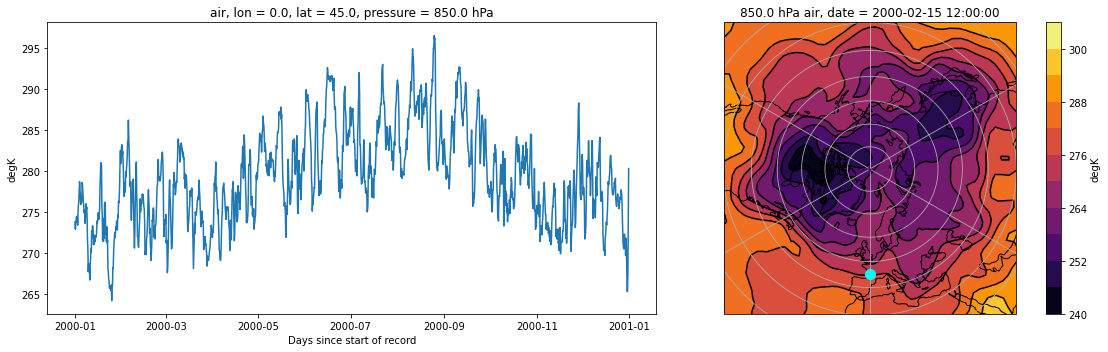

In [84]:
# plot two subplots in one figure!
plt.figure(1,figsize=(16,5))

# subplot 1 =================================
# Here's a time series plot for the year 2000 for level=850, lat=45, lon=0
ax=plt.subplot(1,2,1)
plt.plot(ncep['time'],data_lineplot)
plt.xlabel('Days since start of record')
# use dataArray attributes to label figure
plt.ylabel(ncep['air'].attrs['units']) 
plt.title('{0}, lon = {1}, lat = {2}, pressure = {3} hPa'.format(variable,lonp,latp,levp))
plt.tight_layout()

# subplot 2 =================================
# Here's a polar stereographic map of temperature for mid-Feb
ax=plt.subplot(1,2,2,projection=ccrs.NorthPolarStereo())

# wrap longitudes all the way around
cyclic_data, cyclic_lons = cutil.add_cyclic_point(data_contourplot, coord=ncep['lon'])

#plot!
ax.set_extent((-180,180,30,90),crs=ccrs.PlateCarree())
ax.gridlines()
ax.coastlines()
# plot filled contours
plt.contourf(cyclic_lons,ncep['lat'],cyclic_data,60,transform=ccrs.PlateCarree(),cmap='inferno',levels=10)
plt.colorbar(label=ncep['air'].attrs['units'])
# add solid contours
plt.contour(cyclic_lons,ncep['lat'],cyclic_data,60,transform=ccrs.PlateCarree(),colors = 'k',levels=10)

# add marker on contour plot showing the location of the time series
plt.plot(lonp,latp,marker='o',markersize=10,color='cyan',transform=ccrs.PlateCarree())
plt.title('{0} hPa {1}, date = {2}'.format(levp, variable, datep))
plt.tight_layout()

## Slicing

We can use the dimensions and coordinates to slice data as well. Let's take a slice of the data over North America from the data we used to make the contour plot.

In [85]:
# slice data spanning coordinate ranges
data_NA = data_contourplot.sel(lat=slice(90,20),lon=slice(190,310))

In [86]:
# display
data_NA

<xarray.DataArray 'air' (lat: 29, lon: 49)>
array([[255.1    , 255.1    , 255.1    , ..., 255.1    , 255.1    , 255.1    ],
       [251.6    , 251.5    , 251.4    , ..., 255.1    , 255.3    , 255.4    ],
       [249.7    , 249.5    , 249.3    , ..., 255.4    , 255.6    , 255.8    ],
       ...,
       [287.59998, 287.09998, 286.8    , ..., 283.9    , 282.8    , 282.     ],
       [287.5    , 287.     , 286.7    , ..., 283.7    , 283.4    , 283.3    ],
       [287.3    , 287.     , 286.8    , ..., 283.3    , 283.59998, 284.09998]],
      dtype=float32)
Coordinates:
    level    float32 850.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... 30.0 27.5 25.0 22.5 20.0
  * lon      (lon) float32 190.0 192.5 195.0 197.5 ... 302.5 305.0 307.5 310.0
    time     datetime64[ns] 2000-02-15T12:00:00
Attributes:
    long_name:      6-hourly Air Temperature on Pressure Levels
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    dataset:        NCEP/DOE AMIP-II Reanalysis (Reanalysis-2)
    level_desc:     Pressure Levels
    statistic:      Individual Obs
    parent_stat:    Other
    standard_name:  air_temperature
    actual_range:   [178.  323.9]
    valid_range:    [137.5 362.5]
    _ChunkSizes:    [  1   1  73 144]

Let's plot this using `cartopy`. We will use a different projection, a different plotting function (`pcolormesh`) and a different color map.

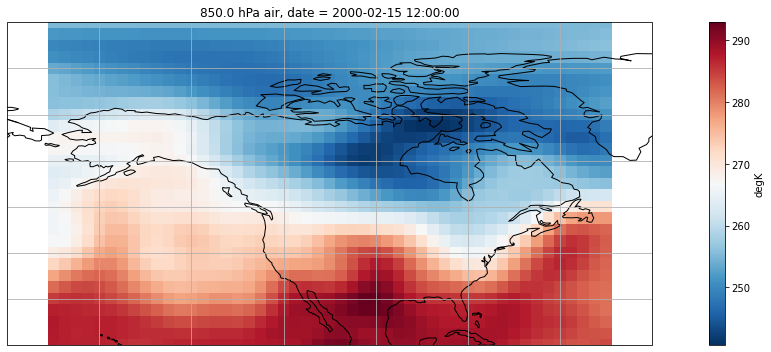

In [87]:
plt.figure(1,figsize=(16,5))
# Here's a polar stereographic map of temperature for mid-Feb
ax=plt.subplot(1,1,1,projection=ccrs.PlateCarree())

#plot!
ax.set_extent((-180,-40,20,90),crs=ccrs.PlateCarree()) # use lats/lons to set extent of plot
ax.gridlines()
ax.coastlines()
# plot filled contours
plt.pcolormesh(data_NA['lon'],data_NA['lat'],data_NA,transform=ccrs.PlateCarree(),cmap='RdBu_r',shading='auto')
plt.colorbar(label=ncep['air'].attrs['units'])
plt.title('{0} hPa {1}, date = {2}'.format(levp, variable, datep))
plt.tight_layout()

Notice how our data only covers the North American region. We can adjust the extent of our map to remove the white spaces.

## Simple Computation

`xarray` also has many built-in functions, just like `numpy` and `pandas`. Let's take a look at a few simple computations we can do.

In [88]:
# find the absolute minimum of a selection of our data
data_lineplot.min()

<xarray.DataArray 'air' ()>
array(264.2, dtype=float32)
Coordinates:
    level    float32 850.0
    lat      float32 45.0
    lon      float32 0.0

In [89]:
# find the average of the data
data_lineplot.mean()

<xarray.DataArray 'air' ()>
array(279.34064, dtype=float32)
Coordinates:
    level    float32 850.0
    lat      float32 45.0
    lon      float32 0.0

In [90]:
# find the average along a single dimension using labels
data_NA.mean(dim='lon')

<xarray.DataArray 'air' (lat: 29)>
array([255.09999, 252.47348, 251.23264, 250.87552, 250.6449 , 250.33061,
       250.37349, 251.20612, 252.47348, 253.38776, 253.66936, 253.95306,
       254.96939, 256.7551 , 258.92245, 261.36124, 264.3367 , 267.7714 ,
       271.0796 , 273.73267, 275.76938, 277.7408 , 280.00204, 282.46326,
       284.6551 , 286.21222, 287.04285, 287.3755 , 287.45712],
      dtype=float32)
Coordinates:
    level    float32 850.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... 30.0 27.5 25.0 22.5 20.0
    time     datetime64[ns] 2000-02-15T12:00:00

This is equivalent to:

In [91]:
# numpy-style also works in xarray
data_NA.mean(axis=1)

<xarray.DataArray 'air' (lat: 29)>
array([255.09999, 252.47348, 251.23264, 250.87552, 250.6449 , 250.33061,
       250.37349, 251.20612, 252.47348, 253.38776, 253.66936, 253.95306,
       254.96939, 256.7551 , 258.92245, 261.36124, 264.3367 , 267.7714 ,
       271.0796 , 273.73267, 275.76938, 277.7408 , 280.00204, 282.46326,
       284.6551 , 286.21222, 287.04285, 287.3755 , 287.45712],
      dtype=float32)
Coordinates:
    level    float32 850.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... 30.0 27.5 25.0 22.5 20.0
    time     datetime64[ns] 2000-02-15T12:00:00

### A note about OPeNDAP

With OPeNDAP URLs, we can also read in a subset of data by slicing. For example, we can select just the Northern Hemisphere latitudes, by selecting just the first 37 elements of the latitude variable. This is handy if you already know the size and order of your dimensions and only need a subset of the data.

In [42]:
file = f'{base_url}{variable}.{year}.nc?air[0:1463][0:16][0:36][0:143]' 
ncep_NH = xr.open_dataarray(file,decode_times=True)

In [46]:
# display some data by indexing using index values rather than labels
ncep_NH[0:2,0,0,0].values

array([265.4, 264. ], dtype=float32)